# Preditor de Credito

## b) Considerando o conjunto de dados Credit Approval Data Set,

6.Explore visualmente e numericamente os dados.

7.Prepare os conjunto de dados utilizando as técnicas ensinadas na disciplina, quando pertinente.

8.Para cada técnica de preparação de dados aplicada, avalie os algorimos K-NN, LogisticRegression, SVM,  Árvore de descisão, RandomForest e um outro algoritmo que deverá ser escolhido pelo aluno.

9.Utilize gráficos e tabelas para apresentar as métricas obtidas (em treino e em teste), e escolha o melhor modelo com base em uma das métricas apresentadas. Justifique a escolha da métrica com base no sistema em questão.10.Envie a URL do jupyter notebook no GitHub.

# Setup do projeto

In [33]:
import joblib
import os
import urllib

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


print('Matplot version: {}'.format(matplotlib.__version__))
print('Numpy version: {}'.format(np.__version__))
print('Pandas version: {}'.format(pd.__version__))
print('sklearn version: {}'.format(sklearn.__version__))
print('Seaborn version: {}'.format(sns.__version__))


CREDIT_ROOT = 'http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/'
CREDIT_URL = CREDIT_ROOT + 'crx.data'

DATA_PATH = os.path.join('..','data', 'raw')
DATA_FILE = 'crx.csv'
CREDIT_DATA = os.path.join(DATA_PATH, DATA_FILE)

RANDOM_STATE = 42

Matplot version: 3.1.3
Numpy version: 1.18.1
Pandas version: 1.0.1
sklearn version: 0.22.1
Seaborn version: 0.10.0


# Recuperação dos dados

In [34]:
def download_data(data_url, data_path, data_file):
    os.makedirs(data_path, exist_ok=True)
    local_path = os.path.join(data_path, data_file)
    urllib.request.urlretrieve(data_url, local_path)


In [35]:
download_data(CREDIT_URL, DATA_PATH, DATA_FILE)

In [36]:
def load_data(data_path, data_file):
    local_path = os.path.join(data_path, data_file)
    return pd.read_csv(local_path, header = None, names=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
                                                         'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'])

In [37]:
credit_data = load_data(DATA_PATH, DATA_FILE)

# 1.Explore visualmente e numericamente os dados.

In [38]:
credit_data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,00120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,00360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,00164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,00080,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,00180,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,00052,1442,+


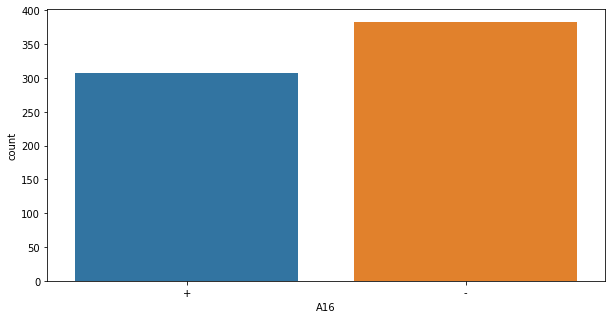

In [39]:
plt.figure(figsize=(10,5))
_= sns.countplot(x='A16', data=credit_data)

In [40]:
credit_data['A16'].value_counts()

-    383
+    307
Name: A16, dtype: int64

In [41]:
credit_data.shape

(690, 16)

## Verificando valores nulos (NA)

In [42]:
credit_data.describe()

,A3,A8,A11,A15
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [43]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    object 
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [44]:
credit_data = credit_data.replace("?",np.NaN)

In [45]:
credit_data.isnull().values.sum()

67

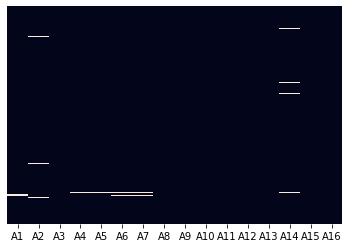

In [46]:
_= sns.heatmap(credit_data.isnull(), yticklabels = False, cbar=False)

In [47]:
credit_data = credit_data.fillna(credit_data.mean())

In [48]:
#imputando os dados com maior frequencia nos dados ausentes
for col in credit_data.columns:
    if credit_data[col].dtypes == 'object':
        credit_data[col] = credit_data[col].fillna(credit_data[col].value_counts().index[0])

In [49]:
credit_data.isnull().values.sum()

0

## Tratamento de dados categoricos

In [50]:
x = credit_data.drop(['A16'],axis = 1)
y = credit_data['A16']

In [51]:
le = LabelEncoder()

for col in x.columns:
    if x[col].dtype=='object':
        x[col]=le.fit_transform(x[col])

In [52]:
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0


## Correlação e distribuição

In [53]:
y.head()

0    +
1    +
2    +
3    +
4    +
Name: A16, dtype: object

In [54]:
y.value_counts()

-    383
+    307
Name: A16, dtype: int64

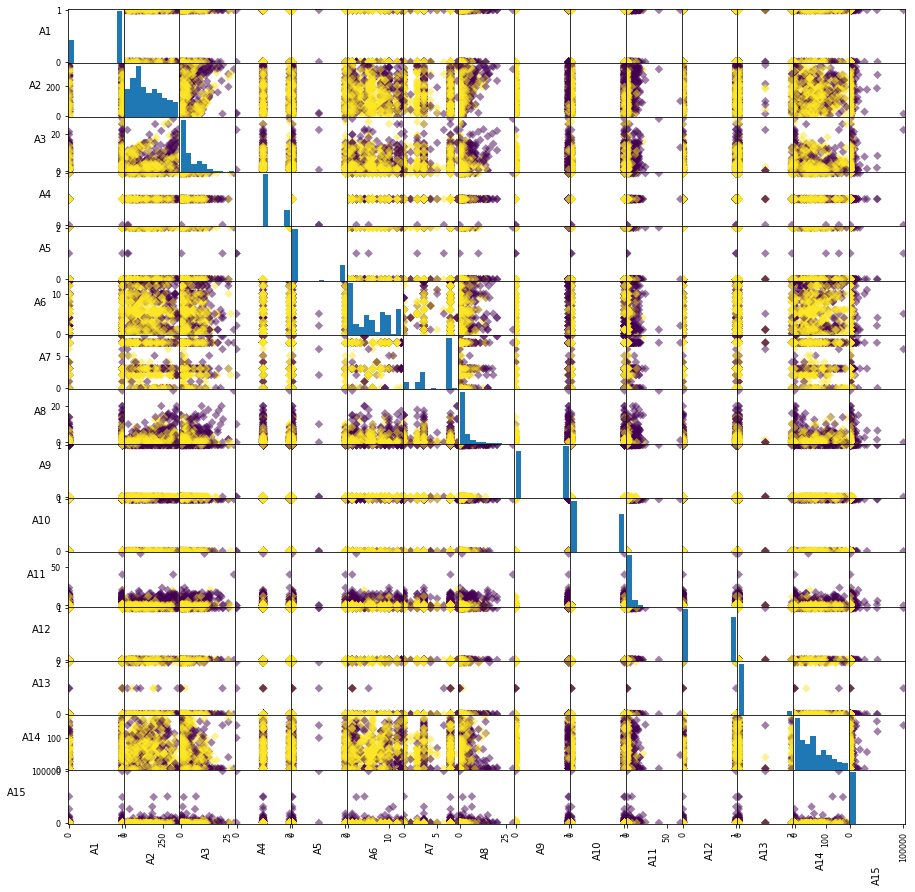

In [55]:
cores = y.astype('category').cat.codes
axes = pd.plotting.scatter_matrix(x, c=cores, figsize=[15,15], marker='D')

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

# 2.Prepare os dados utilizando as técnicas ensinadas na disciplina, quando pertinente.

In [56]:

min_max_scaler = MinMaxScaler()
X_scaled_mm = pd.DataFrame(min_max_scaler.fit_transform(x))
X_scaled_mm.columns = x.columns

scaler = StandardScaler()
X_st_scaled = pd.DataFrame(scaler.fit_transform(x))
X_st_scaled.columns = x.columns

In [57]:
x.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0


In [58]:
X_scaled_mm.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1.0,0.448276,0.000000,0.5,0.0,0.923077,0.875,0.043860,1.0,1.0,0.014925,0.0,0.0,0.402367,0.00000
1,0.0,0.942529,0.159286,0.5,0.0,0.769231,0.375,0.106667,1.0,1.0,0.089552,0.0,0.0,0.065089,0.00560
2,0.0,0.255747,0.017857,0.5,0.0,0.769231,0.375,0.052632,1.0,0.0,0.000000,0.0,0.0,0.568047,0.00824
3,1.0,0.359195,0.055000,0.5,0.0,0.923077,0.875,0.131579,1.0,1.0,0.074627,1.0,0.0,0.183432,0.00003
4,1.0,0.123563,0.200893,0.5,0.0,0.923077,0.875,0.060000,1.0,0.0,0.000000,0.0,1.0,0.218935,0.00000


In [59]:
X_st_scaled.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,0.661438,0.110870,-0.956613,-0.54295,-0.559499,1.471393,0.757878,-0.291083,0.95465,1.157144,-0.288101,-0.919195,-0.317171,0.254785,-0.195413
1,-1.511858,1.961245,-0.060051,-0.54295,-0.559499,1.004392,-0.836439,0.244190,0.95465,1.157144,0.740830,-0.919195,-0.317171,-0.974900,-0.087852
2,-1.511858,-0.609916,-0.856102,-0.54295,-0.559499,1.004392,-0.836439,-0.216324,0.95465,-0.864196,-0.493887,-0.919195,-0.317171,0.858842,-0.037144
3,0.661438,-0.222628,-0.647038,-0.54295,-0.559499,1.471393,0.757878,0.456505,0.95465,1.157144,0.535044,1.087908,-0.317171,-0.543432,-0.194837
4,0.661438,-1.104784,0.174141,-0.54295,-0.559499,1.471393,0.757878,-0.153526,0.95465,-0.864196,-0.493887,-0.919195,3.270501,-0.413991,-0.195413


# 3.Para cada técnica de preparação de dados aplicada, avalie os algorimos K-NN, LogisticRegression, SVM, Árvore de descisão, RandomForest e um outro que deverá ser escolhido pelo aluno.

## Particionamento do dataset

In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size=.15, random_state=RANDOM_STATE)
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(X_scaled_mm, y, stratify = y, test_size=.15, random_state=RANDOM_STATE)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(X_st_scaled, y, stratify = y, test_size=.15, random_state=RANDOM_STATE)

## Treinamento e teste do Modelo

In [61]:
def build_classifiers():
    """Retorna uma lista com os classificadores que serão avaliados"""
    
    classifiers = []
    classifiers.append(
        ('knn',                            # nome do classificador
         KNeighborsClassifier(),           # instancia do classificador
         {'n_neighbors': range(1, 33, 2)}  # hyperparametros
        )
    )

    classifiers.append(
        ('lr',                                               # nome do classificador
        LogisticRegression(max_iter=200),                               # instancia do classificador
         {'penalty': ['l2'], 'C':[100, 10, 1, 0.1, 0.01]}    # hyperparametros
        )
    )
    
    #classifiers.append(
    #    ('svm',                                               # nome do classificador
    #     SVC(),                                               # instancia do classificador
    #     {'kernel': ['linear', 'rbf'], 
    #     'C':[2**(-5), 1, 2**5, 2**10],
    #      'gamma': [2**(-15), 2**(-10), 2**(-5), 1, 2**5]}    # hyperparametros
    #    )
    #)
    
    classifiers.append(
        ('dt',                                               # nome do classificador
         DecisionTreeClassifier(),                           # instancia do classificador
         {'max_depth': [2, 4, 6, 8, 10, 12]}                 # hyperparametros
        )
    )
    
    classifiers.append(
        ('rf',                                               # nome do classificador
         RandomForestClassifier(),                           # instancia do classificador
         {'n_estimators': [10, 50, 100]}                     # hyperparametros
        )
    )
    classifiers.append(
        ('nb',                                               # nome do classificador
         BernoulliNB(),                                      # instancia do classificador
         {'binarize': [True, False]}                                  # hyperparametros
        )
    )
    
    return classifiers

## tabelas para apresentar as métricas obtidas

In [62]:
classifiers = build_classifiers()
results = []
names = []
acuracia_a = []

for name, model, parameters in classifiers:
    print('\n>> classifiers name: {}\n'.format(name))
    gs = GridSearchCV(estimator = model, param_grid = parameters, refit=True, verbose=0)
    kf = KFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    cv = cross_val_score(gs, x_train, y_train, cv=kf, scoring='accuracy')
    print('Mean: {}, Standard Deviation: {}\n'.format(cv.mean(), cv.std()))
    results.append(cv)
    names.append(name)
    
    model.fit(x_train,y_train)
    predicoes = model.predict(x_test)
    print('Predições:{}\n'.format(predicoes))
    print('Matriz de confusão:')
    print(confusion_matrix(y_test, predicoes))
    print()
    print(classification_report(y_test, predicoes))
    print()
    acuracia = model.score(x_test,y_test)
    acuracia_a.append(acuracia)
    print('Acuracia do modelo:{}'.format(acuracia))
    print('_'*30)


>> classifiers name: knn

Mean: 0.6604085180356367, Standard Deviation: 0.01823393026264509

Predições:['-' '-' '-' '-' '-' '-' '+' '+' '-' '+' '-' '+' '+' '+' '-' '+' '+' '-'
 '-' '+' '+' '+' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-' '-'
 '+' '-' '-' '-' '+' '-' '+' '-' '-' '-' '+' '-' '-' '-' '-' '+' '-' '-'
 '-' '+' '-' '-' '+' '-' '-' '-' '-' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '-' '-' '-' '-' '-' '-' '-' '+' '-' '-' '-' '+' '-' '+' '-' '+' '+' '-'
 '-' '-' '-' '-' '+' '-' '-' '-' '+' '-' '+' '-' '-' '-']

Matriz de confusão:
[[23 23]
 [ 9 49]]

              precision    recall  f1-score   support

           +       0.72      0.50      0.59        46
           -       0.68      0.84      0.75        58

    accuracy                           0.69       104
   macro avg       0.70      0.67      0.67       104
weighted avg       0.70      0.69      0.68       104


Acuracia do modelo:0.6923076923076923
______________________________

>> classifiers name: lr



C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\felip\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

Mean: 0.8583659278574534, Standard Deviation: 0.02566988409829328

Predições:['+' '-' '+' '+' '-' '+' '-' '-' '-' '-' '-' '+' '+' '+' '-' '-' '-' '-'
 '-' '+' '+' '+' '-' '+' '+' '-' '-' '-' '+' '-' '-' '+' '-' '+' '+' '-'
 '+' '-' '-' '-' '-' '-' '+' '-' '-' '-' '+' '-' '+' '-' '-' '+' '-' '-'
 '-' '+' '-' '+' '+' '-' '-' '-' '-' '-' '+' '-' '-' '+' '+' '+' '+' '+'
 '+' '-' '+' '+' '+' '-' '+' '+' '-' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '-' '-' '-' '-' '+' '-' '-' '-' '-' '-' '+' '-' '+' '-']

Matriz de confusão:
[[33 13]
 [11 47]]

              precision    recall  f1-score   support

           +       0.75      0.72      0.73        46
           -       0.78      0.81      0.80        58

    accuracy                           0.77       104
   macro avg       0.77      0.76      0.76       104
weighted avg       0.77      0.77      0.77       104


Acuracia do modelo:0.7692307692307693
______________________________

>> classifiers name: dt

Mean: 0.8686513110241924, Standard D

In [63]:
classifiers2 = build_classifiers()
results_st = []
names_st = []
acuracia_st = []

for name, model, parameters in classifiers2:
    print('\n>> classifiers name: {}\n'.format(name))
    gs = GridSearchCV(estimator = model, param_grid = parameters, refit=True, verbose=0)
    kf = KFold(n_splits=10, shuffle=True, random_state = RANDOM_STATE)
    cv = cross_val_score(gs, x_train_st, y_train_st, cv=kf, scoring='accuracy')
    print('Mean: {}, Standard Deviation: {}\n'.format(cv.mean(), cv.std()))
    results_st.append(cv)
    names_st.append(name)
    
    model.fit(x_train_st,y_train_st)
    predicoes = model.predict(x_test_st)
    print('Predições:{}\n'.format(predicoes))
    print('Matriz de confusão:')
    print(confusion_matrix(y_test, predicoes))
    print()
    print(classification_report(y_test_st, predicoes))
    print()
    acuracia = model.score(x_test_st,y_test_st)
    acuracia_st.append(acuracia)
    print('Acuracia do modelo:{}'.format(acuracia))
    print('_'*30)


>> classifiers name: knn

Mean: 0.8772355347749853, Standard Deviation: 0.03844919215542294

Predições:['+' '-' '+' '+' '-' '-' '-' '-' '-' '-' '-' '+' '+' '+' '-' '+' '-' '-'
 '-' '+' '+' '+' '-' '+' '+' '-' '-' '-' '-' '-' '-' '+' '-' '+' '-' '+'
 '+' '-' '+' '-' '+' '-' '+' '-' '-' '-' '+' '-' '+' '-' '-' '+' '-' '-'
 '-' '+' '-' '+' '+' '-' '-' '-' '-' '-' '-' '-' '-' '+' '-' '+' '-' '+'
 '+' '-' '+' '-' '+' '-' '+' '+' '-' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '-' '-' '-' '-' '+' '-' '-' '-' '-' '-' '+' '-' '-' '-']

Matriz de confusão:
[[31 15]
 [ 9 49]]

              precision    recall  f1-score   support

           +       0.78      0.67      0.72        46
           -       0.77      0.84      0.80        58

    accuracy                           0.77       104
   macro avg       0.77      0.76      0.76       104
weighted avg       0.77      0.77      0.77       104


Acuracia do modelo:0.7692307692307693
______________________________

>> classifiers name: lr

Mean: 0.8

In [64]:
classifiers3 = build_classifiers()
results_mm = []
names_mm = []
acuracia_mm = []

for name, model, parameters in classifiers:
    print('\n>> classifiers name: {}\n'.format(name))
    gs = GridSearchCV(estimator = model, param_grid = parameters, refit=True, verbose=0)
    kf = KFold(n_splits=10, shuffle=True, random_state = RANDOM_STATE)
    cv = cross_val_score(gs, x_train_mm, y_train_mm, cv=kf, scoring='accuracy')
    print('Mean: {}, Standard Deviation: {}\n'.format(cv.mean(), cv.std()))
    results_mm.append(cv)
    names_mm.append(name)
    
    model.fit(x_train_mm,y_train_mm)
    predicoes = model.predict(x_test_mm)
    print('Predições:{}\n'.format(predicoes))
    print('Matriz de confusão:')
    print(confusion_matrix(y_test_mm, predicoes))
    print()
    print(classification_report(y_test_mm, predicoes))
    print()
    acuracia = model.score(x_test_mm,y_test_mm)
    acuracia_mm.append(acuracia)
    print('Acuracia do modelo:{}'.format(acuracia))
    print('_'*30)


>> classifiers name: knn

Mean: 0.8737872589129163, Standard Deviation: 0.02521476766624993

Predições:['+' '-' '+' '+' '-' '+' '-' '-' '-' '-' '-' '+' '+' '+' '-' '+' '-' '-'
 '-' '+' '+' '+' '-' '+' '+' '-' '-' '-' '-' '-' '-' '+' '-' '+' '+' '+'
 '+' '-' '+' '-' '+' '-' '+' '-' '-' '-' '+' '-' '+' '-' '-' '+' '-' '-'
 '-' '+' '-' '+' '+' '-' '-' '-' '-' '-' '+' '-' '-' '+' '+' '+' '-' '+'
 '-' '-' '+' '+' '+' '-' '+' '+' '-' '-' '-' '+' '+' '-' '+' '+' '+' '-'
 '-' '-' '-' '-' '+' '-' '-' '-' '-' '-' '+' '-' '-' '-']

Matriz de confusão:
[[33 13]
 [11 47]]

              precision    recall  f1-score   support

           +       0.75      0.72      0.73        46
           -       0.78      0.81      0.80        58

    accuracy                           0.77       104
   macro avg       0.77      0.76      0.76       104
weighted avg       0.77      0.77      0.77       104


Acuracia do modelo:0.7692307692307693
______________________________

>> classifiers name: lr

Mean: 0.8

# 4.Utilize gráficos (em treino e em teste), e escolha o melhor modelo com base em uma das métricas apresentadas. Justifique a escolha da métrica com base no sistema em questão.

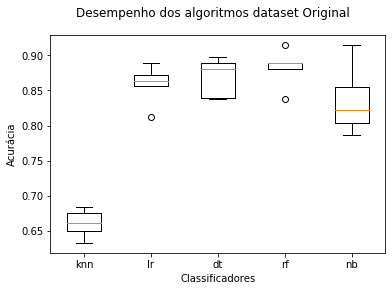

In [65]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset Original')
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()

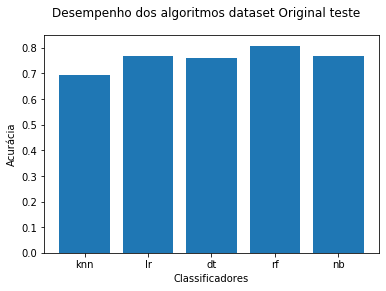

In [66]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset Original teste')
plt.bar(names, acuracia_a)
ax.set_xticklabels(names)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()

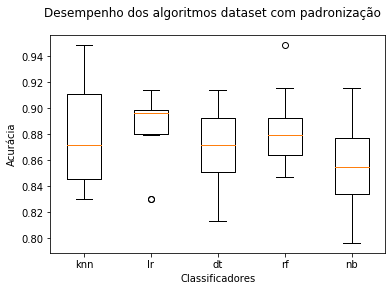

In [67]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset com padronização')
plt.boxplot(results_st)
ax.set_xticklabels(names_st)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()

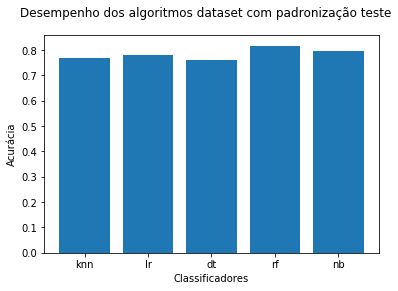

In [68]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset com padronização teste')
plt.bar(names, acuracia_st)
ax.set_xticklabels(names)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()

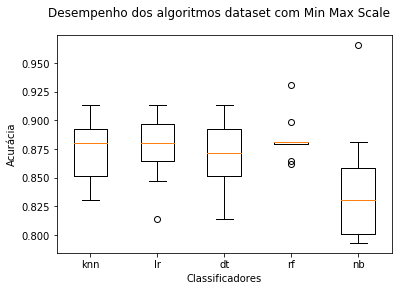

In [69]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset com Min Max Scale')
ax.boxplot(results_mm)
ax.set_xticklabels(names_mm)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()

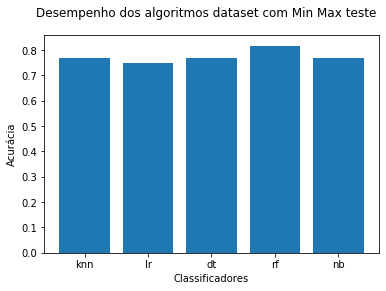

In [70]:
fig, ax = plt.subplots()
fig.suptitle('Desempenho dos algoritmos dataset com Min Max teste')
plt.bar(names, acuracia_mm)
ax.set_xticklabels(names)
ax.set_ylabel('Acurácia')
ax.set_xlabel('Classificadores')

plt.show()



### Melhor modelo foi o Random Forest tanto com normalização como com padronização dos dados, trazendo media de acuracia de 88% em treino e 82% em treinamento. Foi utiliado como metrica principal de avaliação a acuracia por se tratar de uma visão geral do algoritmo, mais podemos observar uma boa performance também nas demais metricas precision, recall,  f1-score 